# Семинар 7. Проверка гипотез: непараметрические критерии

План на сегодняшний семинар:

* Повторить суть непараметрического оценивания
* Таблица сопряженности и хи-квадрат
* Критерий Манна-Уитни
* Критерий Уилкоксона
* Критерий Знаков

В предыдущем семинаре мы рассматривали параметрические критерии. Они достаточно удобны для проверки гипотез, однако зачастую наши данные не подходят для того, чтобы применять для них подобные тесты. Для таких случаяв подходят непараметрические критерии: они могут быть применены для порядковых и номинальных признаках, а также они не нуждаются в предположениях о параметрах генеральной совокупности или форме ее распределения

In [1]:
#подгружаем все необходимые библиотеки
import numpy as np
import pandas as pd
import statsmodels as sm
from scipy import stats

In [2]:
import matplotlib.pyplot as plt


Bad key text.latex.preview in file /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Критерий согласия хи-квадрат

При анализе данных у нас может возникать вопрос о том, как наши наблюдения распределены по каким-то категориям. Например, на сколько больше студентов на коммерции по сравнению с бюджетниками на двух разных факультетах? Или как соотносятся пропорции сдавших и несдавших экзамен по Python в разных группах?
При такой постановке вопроса нас не интересуют какие-то количественные характеристики для конкретного объекта или выборки в целом: нас интересует только принадлежность объекта к той или иной группе. И в таком случае, когда нас в первую очередь интересует соотношение пропорций в генеральной совокупности, мы будем использовать критерий согласия хи-квадрат.

Данный критерий реализован с помощью функции chisquare в модуле stats:
    
* **stats.chisquare(obs, exp)** 

В эту функцию мы передаем два аргумента:

* obs — фактическая частота попадания в ту или иную подгруппу
* exp — ожидаемая частота.

Возможно, вы знакомы с Менделем и его экспериментами с селекцией гороха: эта история отлично подойдет для иллюстрации применения критерия согласия хи-квадрат. 

Краткий экскурс в тему: Мендель вывел теоретический закон распределения частот видов семян, и в 20-м веке было огромное количество исследований, которые основывались на проверке близости этого закона к реальной жизни как раз с помощью критерия согласия хи-квадрата. История была столь популярна, что на ее тему написал статьи даже известный математик - академик Колмогоров.

Давайте и мы проверим, что там происходило с горохом!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Доля | Вероятность |
|:-------------------- |:-------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [4]:
# создаем массивы с реальными частотами (точнее, долями) и с теоретическими вероятностями
obs = np.array([315/556, 101/556, 108/556, 32/556]) #реальные доли - левый столбец в таблице
exp = np.array([9/16, 3/16, 3/16, 1/16]) #теоретические вероятности - правый столбец в таблице

Ранее мы посмотрели, что в функцию для реализации критерия согласия мы передаем фактические частоты, а у нас только доли. Чтобы получить из них частоты, мы умножим каждую долю на общее количество семян:

In [5]:
obs = obs*556 #рассчитали реальные частоты
exp = exp*556 #рассчитали ожидаемые частоты

In [6]:
obs

array([315., 101., 108.,  32.])

In [7]:
exp

array([312.75, 104.25, 104.25,  34.75])

In [8]:
# запускаем функцию для критерия хи-квадрат
stats.chisquare(obs, exp) 

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

Мы видим, что у нас получилось очень большое значение p-value: оно свидетельствует о том, что мы не отвергаем нулевую гипотезу. Значит, закон Менделя работает!

## Задача 1

У некоторого преподавателя НИУ ВШЭ есть предположение, что 25% студентов сдают ДЗ заранее, 60% в последний момент, а 15% вовсе забывают о домашнем задании. После первого ДЗ на курсе "Введение в Data Science" было выявлено, что из 330 студентов 60 сдали ДЗ заранее, 200 в последний момент, а 70 - вовсе забыли о ДЗ. Проверьте гипотезу о том, что предположение преподавателя о теоретическом распределении вероятностей верное.

In [12]:
#YOUR CODE
obs = [60, 200, 70] # наблюдаемые частоты
exp = [330 * 0.25, 330 * 0.6, 330 * 0.15]

stats.chisquare(obs, exp)

# H0 отвергается на лруз
# Предположение преподавателя неверно

Power_divergenceResult(statistic=14.646464646464647, pvalue=0.0006600253442961802)

# Критерий независимости хи-квадрат Пирсона (критерий независимости номинальных признаков Пирсона)

Еще один критерий - критерий независимости хи-квадрат Пирсона - нужен нам для того, чтобы проверять наличие взаимосвязи между двумя признаками.

Пусть у нас есть пациенты, которых проверяли на предмет наличия сердечных заболеваний. И мы хотим проверить, есть ли взаимосвязь у пола пациента и наличия у него заболевания. Нулевая гипотеза заключается в том, что признаки независимы.
* Пол записан в признаке sex (1-мужчины, 0-женщины)
* Наличие заболевания записано в признаке target (1 - заболевание обнаружено, 0 - нет)

In [13]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [16]:
df.shape

(303, 10)

В первую очередь построим таблицу сопряженности:

In [14]:
t = df.groupby('sex')['target'].value_counts().unstack()
t

target,0,1
sex,,
0,24,72
1,114,93


In [20]:
t.iloc[0, :]

target
0    24
1    72
Name: 0, dtype: int64

Теперь рассчитаем суммарное количество здоровых и больных, а также общую сумму:

In [17]:
n_0 = t[0].sum()
n_1 = t[1].sum()
n_sum = n_0 + n_1
print(n_0, n_1, n_sum)

138 165 303


Рассчитаем доли:

In [18]:
p_0 = n_0 / n_sum
p_1 = n_1 / n_sum
print(p_0, p_1)

0.45544554455445546 0.5445544554455446


Рассчитаем суммарное количество мужчин и женщин:

In [21]:
n_w = t.iloc[0].sum()
n_m = t.iloc[1].sum()
print(n_w, n_m)

96 207


Рассчитываем ожидаемые в случае независимости признаков частоты для мужчин (здоровых и больных) и для женщин (здоровых и больных):

In [23]:
e0_women = n_w * p_0
e1_women = n_w * p_1
e0_men = n_m * p_0
e1_men = n_m * p_1

In [24]:
print(e0_women, e1_women, e0_men, e1_men)

43.722772277227726 52.27722772277228 94.27722772277228 112.72277227722773


Составим таблицу ожидаемых частот:

In [25]:
t_e = np.array([[e0_women, e1_women], [e0_men, e1_men]])
t_e

array([[ 43.72277228,  52.27722772],
       [ 94.27722772, 112.72277228]])

Рассчитываем значение статистики:

$
\chi^2 = \sum{\frac{(f_o - f_e)^2}{f_e}}
$

В данной формуле $f_o$ - это наблюдаемые частоты, а $f_e$ - ожидаемые частоты

In [26]:
chi_square = ((t - t_e)**2/t_e).sum().sum() #суммируем сначала по полу, потом в целом
print(chi_square)

23.914383914761984


Рассчитаем значение количества степей свободы:

$
dof = (R - 1)(C - 1)
$

В формуле R - количество строк нашей таблицы, а C - количество столбцов.

In [27]:
dof = (t.shape[0] - 1) * (t.shape[1] - 1)
dof

1

_Примечание: количество степеней свободы - это количество значений в итоговом вычислении статистики, способных варьироваться. Смысл в том, что при разном значении степеней свободы будет меняться форма распределения статистик хи-квадрат. А значит и значения критерия, отсекающие определенную пропорцию распределения, будут варьироваться.(с)_

In [28]:
pvalue = 1-stats.chi2.cdf(chi_square, df=1)
print(pvalue)

1.0071642033704364e-06


Можно было бы рассчитать и автоматически:

In [29]:
stats.chi2_contingency(t, correction=False)

(23.914383914761988,
 1.0071642033238865e-06,
 1,
 array([[ 43.72277228,  52.27722772],
        [ 94.27722772, 112.72277228]]))

Время решить задачу самостоятельно! (ну почти)

## Задача 2 (парадокс Симпсона)

Не забывайте, что мы должны не только уметь применять функции из библиотек, но еще надо понимать, какие действия с данными корректны, а какие нет.

Перед вами результаты медицинских исследований. Из 1650 мужчин, испытывающих лекарство, выздоровели 770, из 223 не принимавших выздоровели 88. Из 245 принимавших женщин — 165, из 750 не принимавших — 440.

Необходимо проверить следующее:
1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Запишем данные в аккуратную табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

### Есть ли эффект от лекарства у мужчин? 

Заметим, что среди принимавших лекарство мужчин доля выздоровевших больше, чем среди мужчин, не принимавших лекарство:

$$\frac{770}{770 + 880} \approx 0.467 \qquad > \qquad 0.395 \approx \frac{88}{88 + 135}.$$
  
Проверим, значимо ли это различие.

In [30]:
#создаем массивы для наших данных 

men = np.array([[770,880],[88,135]]) #частоты для мужчин
women = np.array([[165,80],[440,310]]) #частоты для женщин
both = men + women #складываем частоты для женщин и для мужчин, чтобы получить суммарные частоты

In [31]:
# можно реализовать критерий вручную 

n = np.sum(men) # количество испытуемых среди мужчин
n1,n2 = np.sum(men,axis=1) # количество испытуемых, принимавших и не принимавших лекарство среди мужчин
p = np.sum(men,axis=0)/n # вероятности попасть в (B) и (not B)
exmen = np.array([p*n1,p*n2]) # ожидаемые количества в каждой ячейке

statistic = np.sum((men - exmen)**2/exmen) #рассчитываем значение статистики
pvalue = 1-stats.chi2.cdf(statistic, df=1) #значение p-value

print("statistic = ", statistic)
print("p-value = ", pvalue)

statistic =  4.107854906463222
p-value =  0.04268446899604583


In [32]:
stats.chi2_contingency(men, correction=False)

(4.107854906463222,
 0.04268446899604581,
 1,
 array([[755.84623599, 894.15376401],
        [102.15376401, 120.84623599]]))

### Есть ли эффект от лекарства у женщин? 

In [33]:
#YOUR CODE
stats.chi2_contingency(women, correction=False)

(5.838444095586957,
 0.015679686056826774,
 1,
 array([[148.96984925,  96.03015075],
        [456.03015075, 293.96984925]]))

Для женщин соответствующие доли равны $0.673>0.587$ - среди принимавших лекарство доля выздоровевших больше, чем среди не принимавших лекарство, различия значимы.

### Есть ли эффект от лекарства у мужчин и женщин вместе? 

In [34]:
# YOUR CODE
stats.chi2_contingency(both, correction=False)

(6.239588767305169,
 0.012492547994073244,
 1,
 array([[966.66143654, 928.33856346],
        [496.33856346, 476.66143654]]))

Как это ни странно, из таблицы с объединенными результатами следует, что доля выздоровевших больше среди тех людей, которые лекарство **не принимали**:

$$\frac{935}{935+960} \approx 0.493 \qquad < \qquad 0.542 \approx \frac{528}{528+445}.$$
  

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. Проблема здесь в том, что объединять эти выборки просто слив данные вместе нельзя: контрольные группы (не принимавших лекарство) занимают разный объем от выборок -- примерно 12% в случае мужчин и 75% в случае женщин.

# Критерий Манна-Уитни

U-критерий Манна-Уитни - это непараметрический статистический критерий, используемый для оценки различий между двумя выборками по признаку, измеренному в количественной или порядковой шкале. U-критерий является ранговым.

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 


**Нулевая гипотеза**: $F_{X_1} = F_{X_2}$ - значения из выборок равномерно рассеяны в вариационном ряде.

**Альтернативная гипотеза (двусторонняя альтернатива)**  $F_{X_1} \not= F_{X_2}$ - значения в какой-то из выборок рассеяны в вариационном ряде неравномерно.


**Статистика** Уложим обе наши выборки в один вариационный ряд. После чего подсчитаем сумму рангов, приходящуюся на элементы первой выборки ($R_1$) и на элементы  второй выборки ($R_2$). 

$$U_1 = n_1n_2 + \dfrac{n_2(n_2+1)}{2} - R_1$$

$$U_2 = n_1n_2 + \dfrac{n_1(n_1+1)}{2} - R_2$$

$$U = min(U_1, U_2)$$

**Нулевое распределение** Табличное


In [35]:
import matplotlib.pyplot as plt
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются медианные значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

Теперь давайте решим реальную задачку. 

In [37]:
df = pd.read_csv('Albuquerque Home Prices_data (1).txt', sep='\t')

In [38]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


Хотим проверить, что цены домов на углу (COR = 1) отличаются от цен домов не на углу (COR = 0). Мы хотели бы применить t-критерий Стьюдента, но, увы, данные не удовлетворяют предпосылкам.
Также заметьте, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [39]:
df = df.replace(-9999, np.nan)

In [40]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [41]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

<AxesSubplot:>

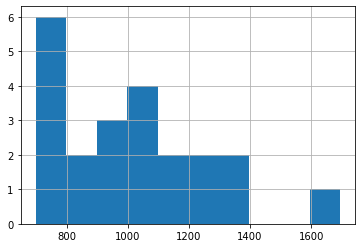

In [49]:
x.hist()

<AxesSubplot:>

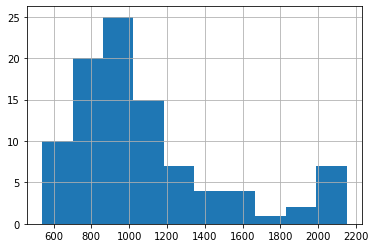

In [48]:
y.hist()

In [50]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.8044081572425339


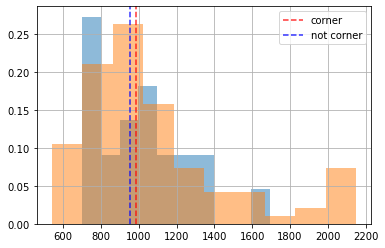

In [51]:
two_histograms(x, y)

## Задача 3

Проверьте, отличаются ли цены домов на северо-востоке от цен домов в других местах.

In [52]:
x = df[df['NE'] == 1]['PRICE']
y = df[df['NE'] == 0]['PRICE']

In [53]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.10544080986815679


# Критерий Уилкоксона

Критерий Уилкоксона (Вилкоксона) для связных выборок — непараметрический статистический критерий, применяемый для оценки различий между двумя зависимыми выборками, взятыми из закона распределения, отличного от нормального, либо измеренными с использованием порядковой шкалы. Критерий является аналогом t-критерия Стьюдента для связанных выборок в тех случаях, когда предпосылки для применения t-критерия не выполняются.

Обычно критерий Уилкоксона применяют для того, чтобы сравнить показатели до и после лечения, до обучения и после и т.д.

**Выборки**    $X_1^{n1} = {X_{11} ... X_{1n_1}}$ и выборка $X_2^{n2} = {X_{21} ... X_{2n_2}}$ 

Важно, что выборки являются связными.


**Нулевая гипотеза**    $H_0: P(X_1 > X_2) = \frac{1}{2}$

**Альтернативная гипотеза**     $H_1: P(X_1 > X_2) \not= \frac{1}{2}$ (Двусторонняя альтернатива)

**Вычисление статистики критерия:**

* Рассчитать значения разностей пар двух выборок. Нулевые разности далее не учитываются. N - количество ненулевых разностей.
* Проранжировать модули разностей пар в возрастающем порядке.
* Приписать рангам знаки соответствующих им разностей.
* Рассчитать сумму R положительных рангов.

Рассмотрим файл reaction.xls, где  содержатся времена реакции испытуемых на световой и звуковой сигналы соответственно. Необходимо проверить гипотезу однородности времен рекции на различные раздражители.

In [54]:
df = pd.read_excel('reaction.xls')
df.head()

,LIGHT,SOUND
0,176,168
1,163,215
2,152,172
3,155,200
4,156,191


In [55]:
sample1 = df['LIGHT']
sample2 = df['SOUND']

В критерии Уикоксона есть предположение о нормальном распределении остатков. Для того, чтобы прикинуть, что это предположение выполнено, построим гистограмму для остатков:

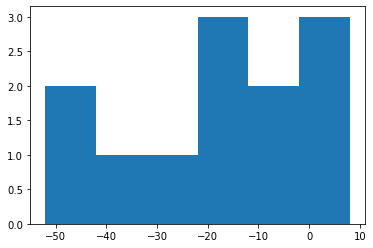

In [56]:
plt.figure(figsize=(6,4))
plt.hist(sample1-sample2, bins=6)
plt.show()

In [57]:
stats.wilcoxon(sample1, sample2)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=4.5, pvalue=0.011197738894413023)

In [58]:
stats.wilcoxon(sample1,sample2, alternative='less')

WilcoxonResult(statistic=4.5, pvalue=0.005598869447206512)

In [59]:
stats.wilcoxon(sample1,sample2, alternative='greater')

WilcoxonResult(statistic=4.5, pvalue=0.9944011305527934)

In [60]:
stats.mannwhitneyu(sample1,sample2, alternative='two-sided')

MannwhitneyuResult(statistic=33.0, pvalue=0.02603404658534565)

## Задача 4

Пусть у нас есть баллы студентов за пробный экзамен до посещения интенсива и после. Проверьте гипотезу, есть ли значимый прирост знаний благодаря посещению интенсива.

In [ ]:
st_before = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
st_after = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

# Критерий Знаков

Критерий знаков  - это статистический критерий, позволяющий проверить нулевую гипотезу, что выборка подчиняется биномиальному распределению с параметром p=1/2. Критерий знаков можно использовать как непараметрический статистический критерий для проверки гипотезы равенства медианы заданному значению (в частности, нулю), а также отсутствия сдвига (отсутствия эффекта обработки) в двух связных выборках. 

**Выборка**    $X_n = {X_1 ... X_n}$ 

**Нулевая гипотеза**    $H_0: median(X) = M$

**Альтернативная гипотеза**     $H_1: median(X) \not= M$ (двусторонняя альтернатива)

**Статистика** $T(X_n) = \sum_i[X_i>M]$ Здесь $[]$- индикаторная функция (равна 1, если условие в скобках истинно и нулю в противном случае)

**Нулевое распределение** $T \sim Binomial(n,\dfrac{1}{2})$

In [61]:
from statsmodels.stats.descriptivestats import sign_test

In [62]:
sign_test(sample1-sample2)

(-3.5, 0.0654296875)

## Задача 5

В 2004 году проводился следующий эксперимент: 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток. Проверьте гипотезу о том, что медиана доли времени, проведенного в клетке с зеркалом, равна 0.5. Данные в файле mirror_mouses.txt.

In [76]:
data = pd.read_csv('mirror_mouses.txt', sep='\t', header = None)

In [77]:
data

,0
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [78]:
sign_test(data, 0.5)

(-5.0, 0.021270751953125)